In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [19]:
# Load the dataset
df = pd.read_csv('adult_with_headers.csv')

In [20]:
df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [21]:
df.tail(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [22]:
df.shape

(32561, 15)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis

In [24]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


In [25]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [39]:
# Handle missing values (if any)
df.fillna(df.mean(), inplace=True)

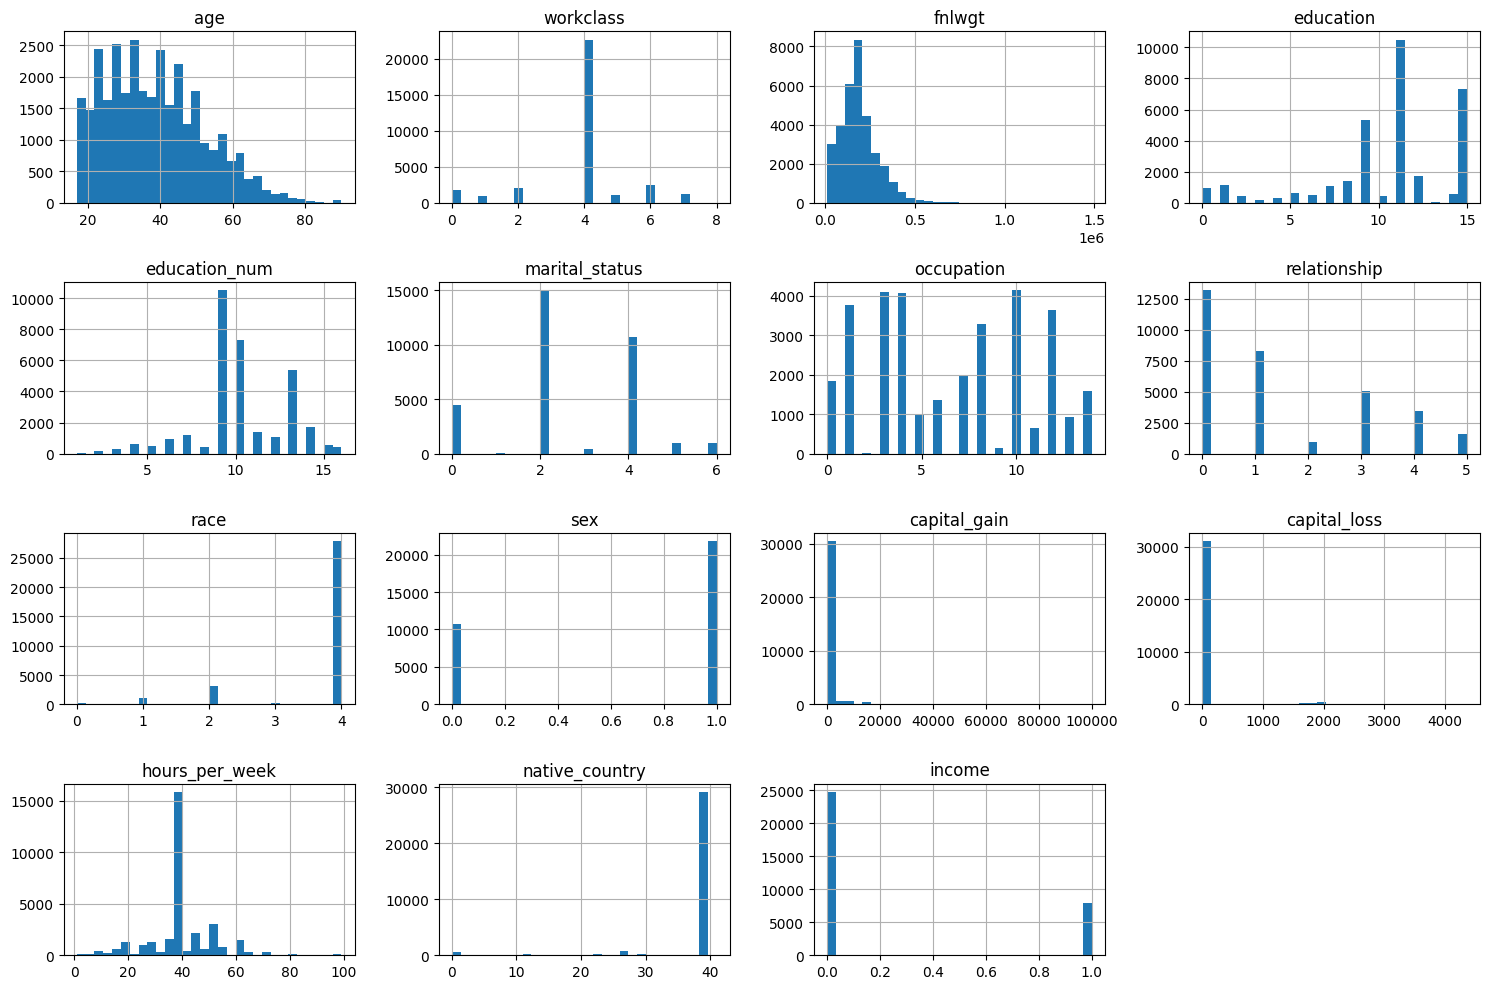

In [37]:
## Histograms
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

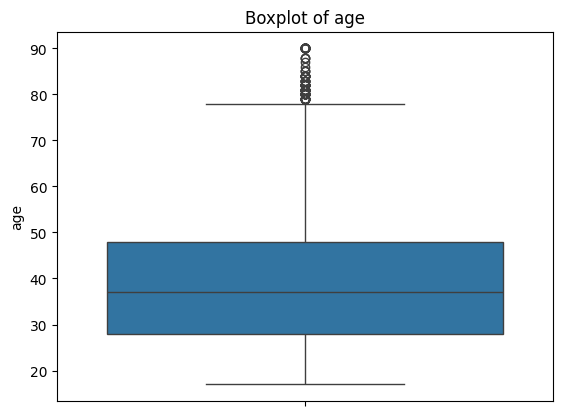

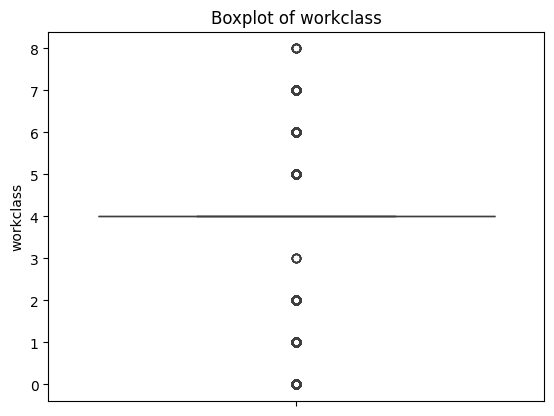

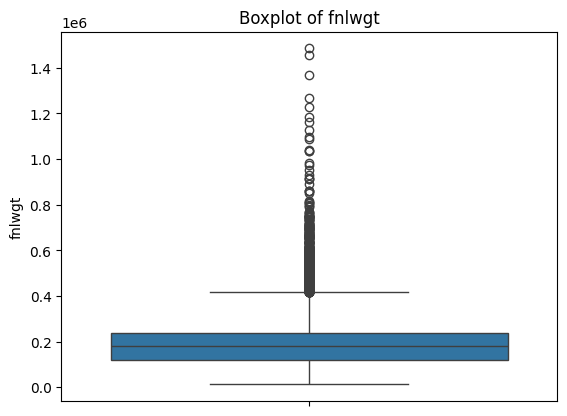

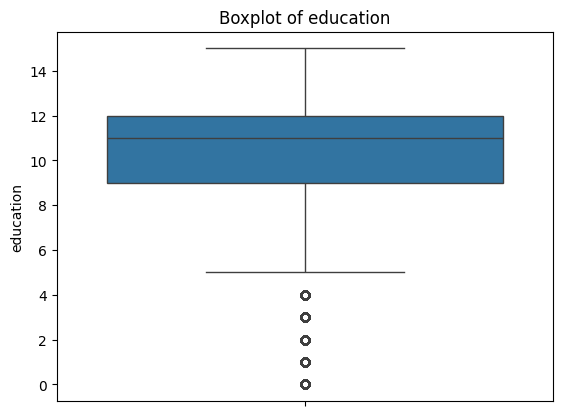

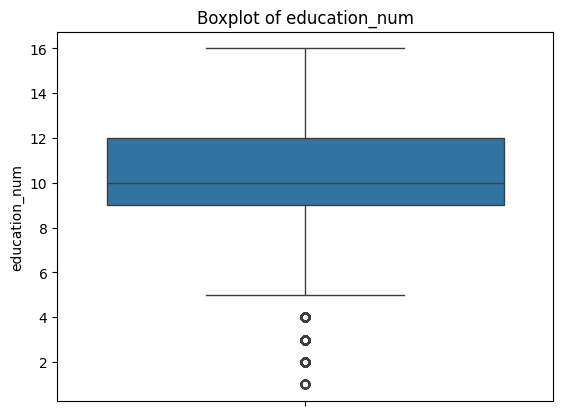

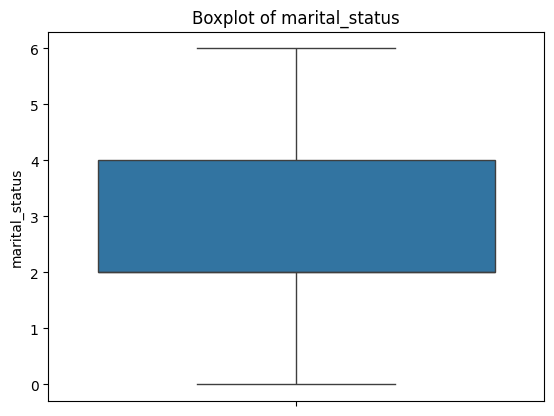

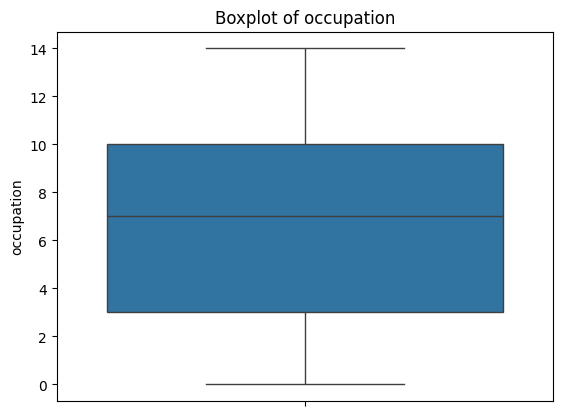

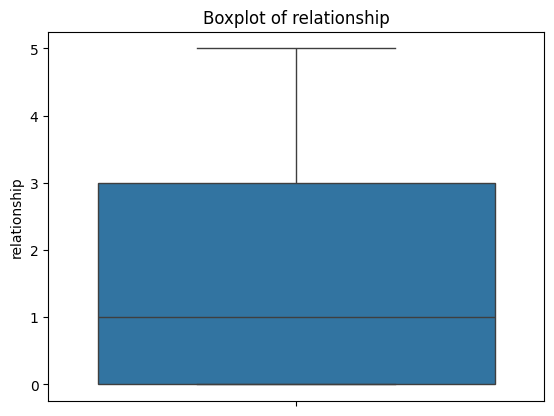

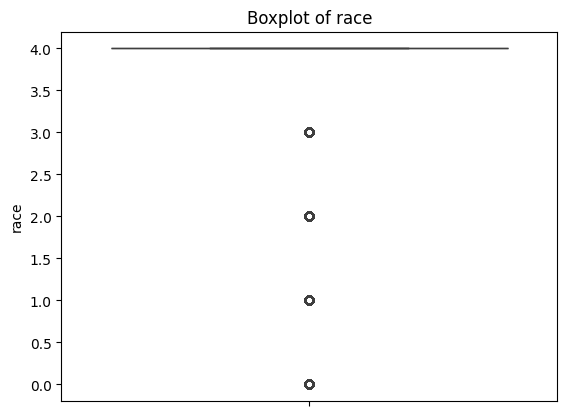

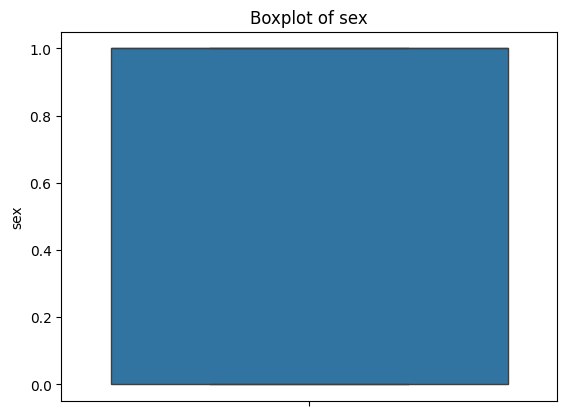

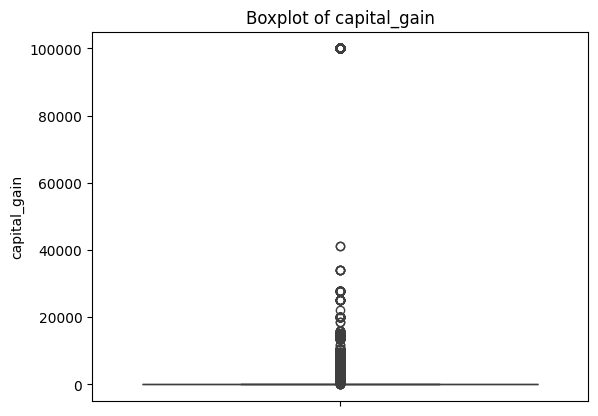

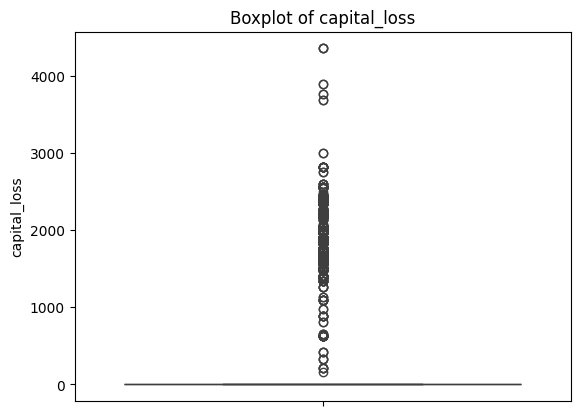

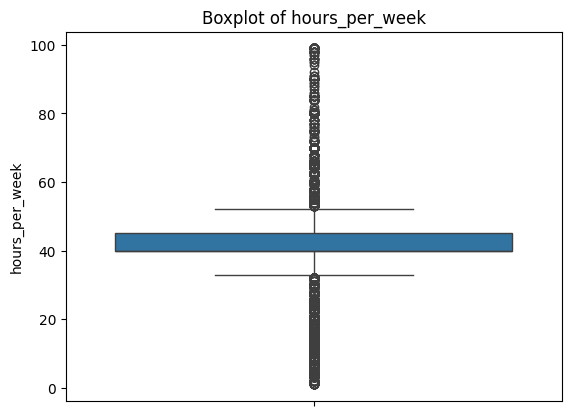

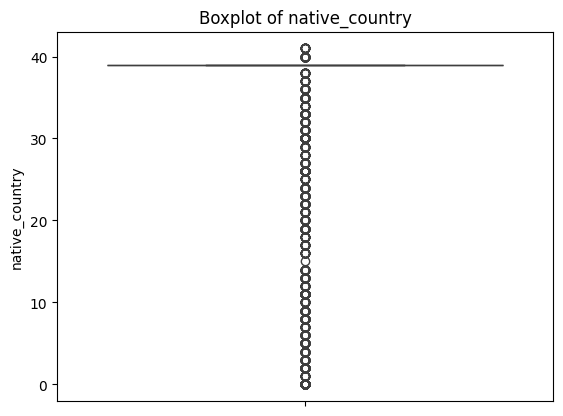

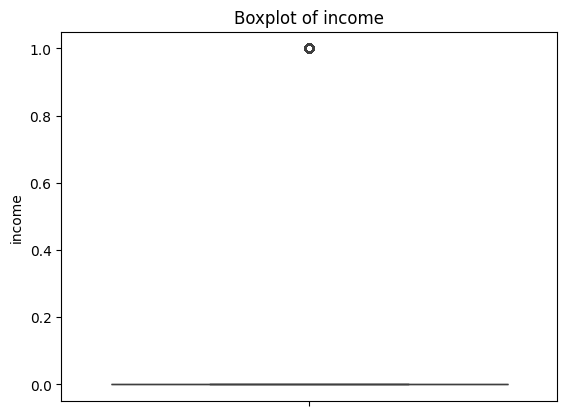

In [38]:
# Boxplots
for column in df.select_dtypes(include=np.number).columns:
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

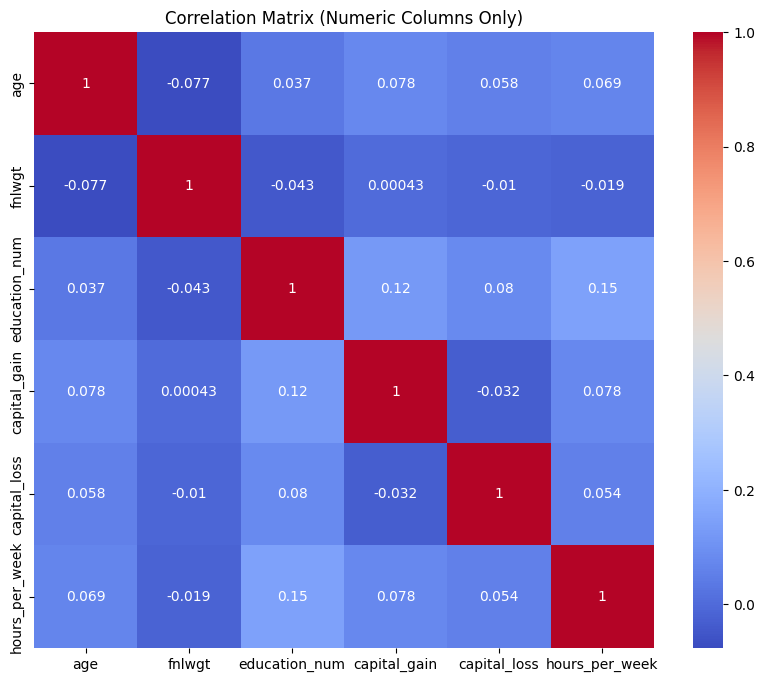

In [28]:
# Drop non-numeric columns for correlation matrix calculation
df_numeric = df.select_dtypes(include=np.number)

# Correlation matrix on numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric Columns Only)")
plt.show()

#Feature Engineering:

In [29]:
#Handle categorical features
# Example: Encode categorical columns
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [31]:
cat_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [32]:
le

LabelEncoder()

In [30]:
df[col]

,income
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


#Decision Tree Classification

In [41]:
# Separate features and target
X = df.drop('income', axis=1)
y = df['income']

In [42]:
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
X_train, X_test, y_train, y_test

(       age  workclass  fnlwgt  ...  capital_loss  hours_per_week  native_country
 5514    33          2  198183  ...             0              50              39
 19777   36          4   86459  ...          1887              50              39
 10781   58          6  203039  ...             0              40              39
 32240   21          4  180190  ...             0              46              39
 9876    27          4  279872  ...             0              40              39
 ...    ...        ...     ...  ...           ...             ...             ...
 29802   47          4  359461  ...             0              40              39
 5390    31          4  147215  ...             0              21              39
 860     18          4  216284  ...             0              20              39
 15795   50          6   54261  ...             0              84              39
 23654   34          5  127651  ...             0              60              39
 
 [26048 rows x

In [44]:
## Model training
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [45]:
# Predictions
y_pred = clf.predict(X_test)


In [46]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [48]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[4298  644]
 [ 577  994]]


In [49]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88      4942
           1       0.61      0.63      0.62      1571

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.75      6513
weighted avg       0.82      0.81      0.81      6513



In [50]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.8125287885766928


#Hyperparameter Tuning

In [51]:
# Define parameters grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [52]:
# Grid Search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [53]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best Accuracy: 0.851812207500012


In [54]:
# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_best))


Tuned Model Accuracy: 0.8552126516198373


In [55]:
best_model

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [56]:
y_pred_best

array([0, 0, 1, ..., 1, 0, 0])

#Model Visualization & Analysis

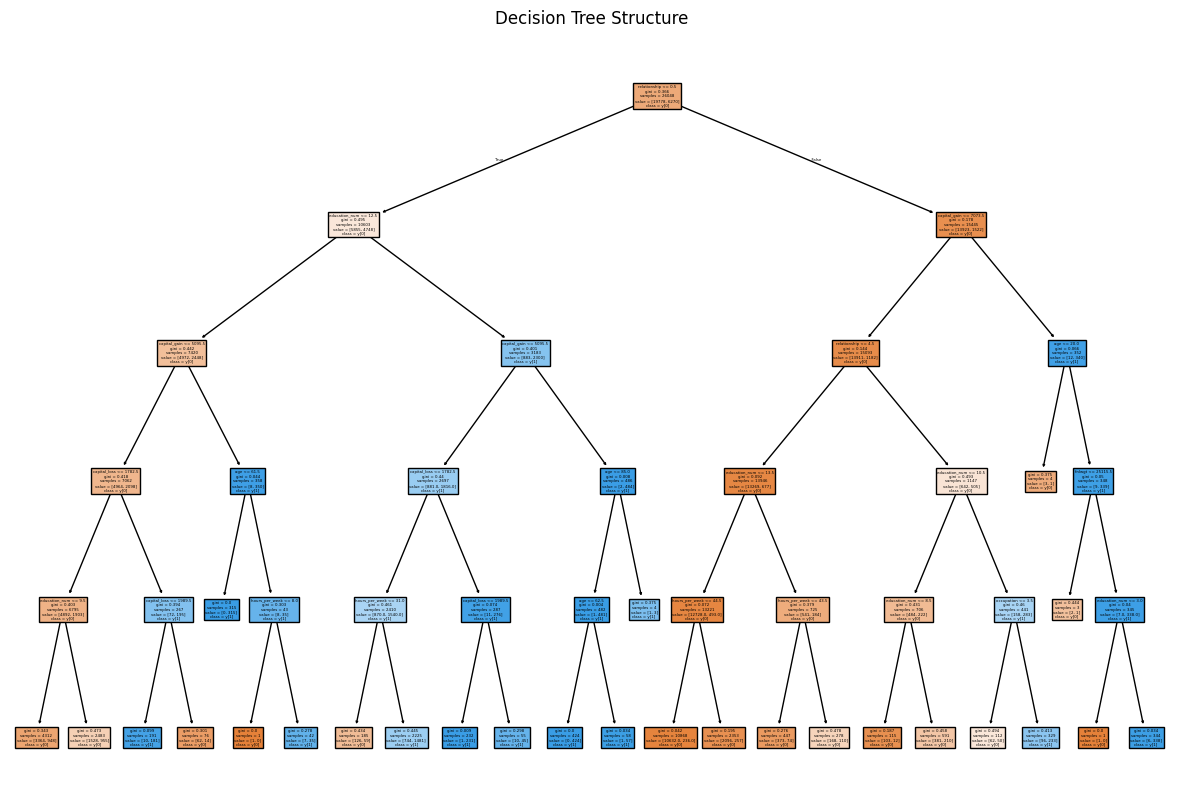

In [57]:
# Visualize Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns, class_names=True, filled=True)
plt.title("Decision Tree Structure")
plt.show()

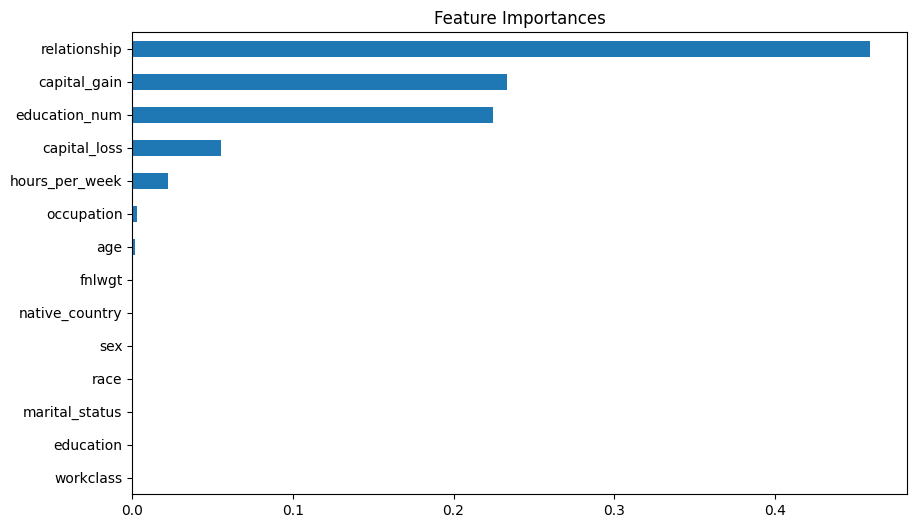

In [58]:
# Feature Importance
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances")
plt.show()


#Interview Questions:

In [ ]:
#1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

  #max_depth: Limits how deep the tree can grow. Prevents overfitting by restricting complexity.
  #min_samples_split: Minimum samples required to split a node. Higher values simplify the tree and reduce overfitting.
  #min_samples_leaf: Minimum samples required in a leaf. Ensures no small, noisy leaf nodes.
  #max_features: Number of features to consider when splitting. Controls randomness and can help generalize better.



In [ ]:
# 2. What is the difference between the Label encoding and One-hot encoding?

   #Label Encoding: Converts categories into integers (e.g., Red=0, Blue=1). Simple, but may imply order that doesn’t exist.

   #One-Hot Encoding: Creates separate binary columns for each category. Avoids false ordering but increases feature space.


